In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [10]:
analysis = scripts.Analysis()

In [11]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_1900',
                          'ng_5',
                          'g_descending',
                          'refPTs_P_1_T_250__P_50_T_250__P_400_T_250',
                          'ng_refs_2__1__2',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__.5__all.85',
                          'bigsum',
                          'option_wgt_1',
                          'crd_1fdb14d',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [12]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_1900',
                          'ng_5',
                          'g_descending',
                          'refPTs_P_1_T_250__P_50_T_250__P_400_T_250',
                          'ng_refs_2__1__2',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__.5__all.85',
                          'bigsum',
                          'option_wgt_1',
                          'crd_1fdb14d',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [13]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 5 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 50)

fig.set_pressure_displayrange(low=1e-2)

In [14]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [15]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [16]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [17]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1380

nband = 520

nv = 200

dv = 0.005

tsfc = 294.0

ng = 5

nref = 3

p_refs = (/ 1,  50, 400 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 2,   1,   2 /)

data wgt
     &     /2*.85, .5, 2*.5/

planck_wgt_flux = 2

option_wgt = 1

include 'mls75.pro'


In [18]:
fig.display_hrefanchor()

In [19]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [20]:
table_dgdgs.display_hrefanchor()

In [21]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [22]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [23]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

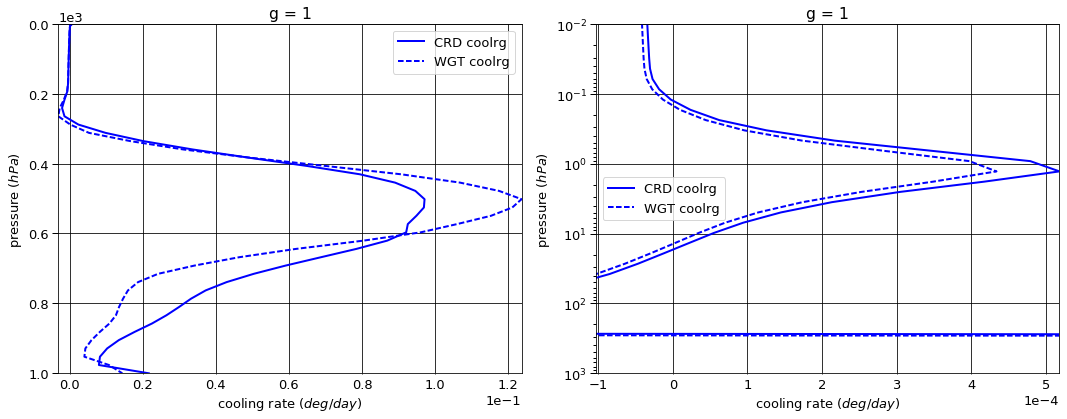

# Figure: cooling rate g-group 2

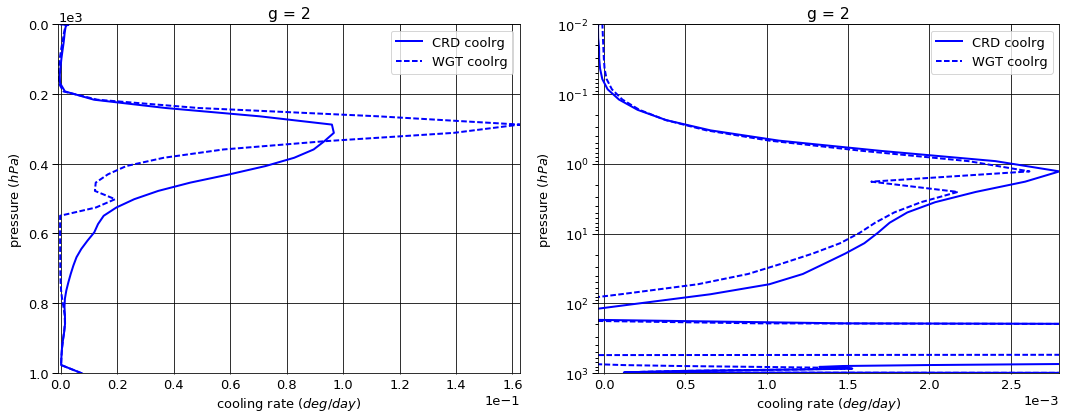

# Figure: cooling rate g-group 3

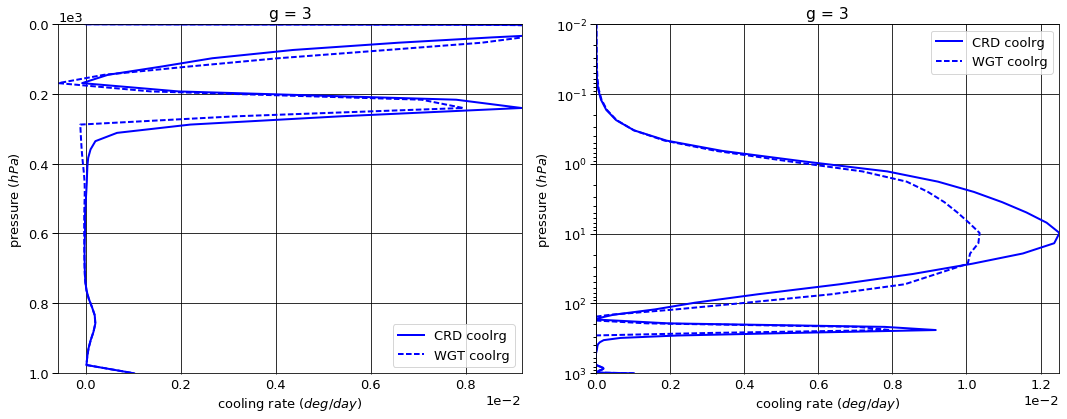

# Figure: cooling rate g-group 4

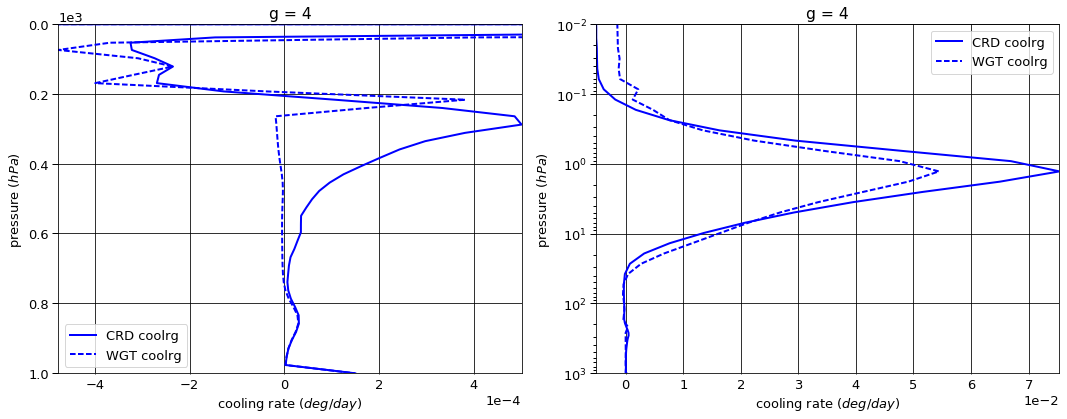

# Figure: cooling rate g-group 5

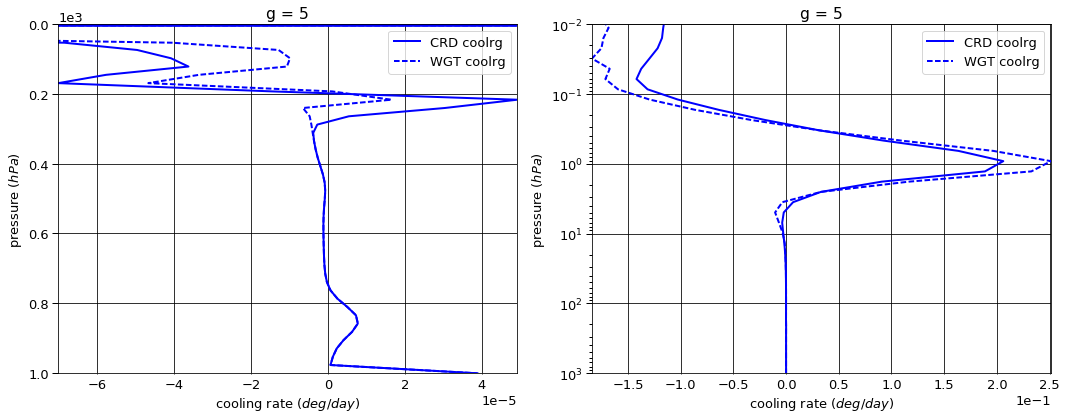

# Figure: cooling rate g-group total

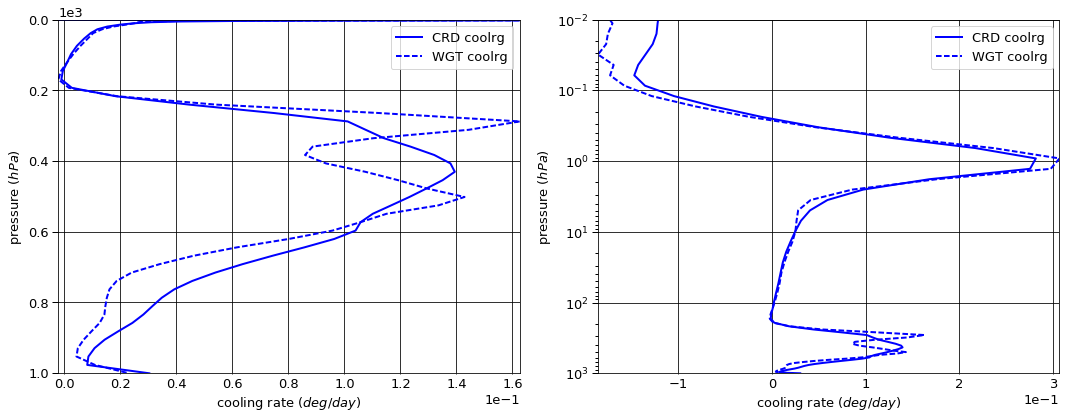

In [24]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [25]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -4.368286   0.000000 -4.368286
  1013.0   76    -12.488425  12.415812 -0.072612
2 0.0      1      -2.648186   0.000000 -2.648186
  1013.0   76    -15.699152  15.678262 -0.020890
3 0.0      1      -0.178810   0.000000 -0.178810
  1013.0   76     -2.145736   2.142882 -0.002853
4 0.0      1      -0.053347   0.000000 -0.053347
  1013.0   76     -0.314398   0.313978 -0.000419
5 0.0      1      -0.026353   0.000000 -0.026353
  1013.0   76     -0.081906   0.081797 -0.000109


WGT


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -4.019875   0.000000 -4.019875
  1013.0   76    -12.488425  12.471857 -0.016568
2 0.0      1      -2.201087   0.000000 -2.201087
  1013.0   76    -15.699152  15.678271 -0.020881
3 0.0      1      -0.163596   0.000000 -0.163596
  1013.0   76     -2.145736   2.142882 -0.002853
4 0.0      1      -0.047492   0.000000 -0.047492
  1013.0   76     -0.314398   0.313979 -0.000418
5 0.0      1      -0.029174   0.000000 -0.029174
  1013.0   76     -0.081906   0.081797 -0.000109


WGT - CRD


flug          fldg         fnetg
g pressure level                                      
1 0.0      1      0.348412  0.000000e+00  3.484116e-01
  1013.0   76     0.000000  5.604500e-02  5.604456e-02
2 0.0      1      0.447099  0.000000e+00  4.470990e-01
  1013.0   76     0.000000  9.000000e-06  8.587000e-06
3 0.0      1      0.015214  0.000000e+00  1.521412e-02
  1013.0   76     0.000000  0.000000e+00  0.000000e+00
4 0.0      1      0.005856  0.000000e+00  5.855649e-03
  1013.0   76     0.000000  8.800000e-07  8.737000e-07
5 0.0      1     -0.002821  0.000000e+00 -2.821370e-03
  1013.0   76     0.000000  0.000000e+00  0.000000e+00

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000039
  1001.112500 75     0.021658
2 0.000312    1     -0.000066
  1001.112500 75     0.007452
3 0.000312    1     -0.000003
  1001.112500 75     0.001018
4 0.000312    1     -0.005421
  1001.112500 75     0.000150
5 0.000312    1     -0.130671
  1001.112500 75     0.000039


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000046
  1001.112500 75     0.014412
2 0.000312    1     -0.000027
  1001.112500 75     0.007447
3 0.000312    1      0.000002
  1001.112500 75     0.001018
4 0.000312    1     -0.001757
  1001.112500 75     0.000149
5 0.000312    1     -0.185304
  1001.112500 75     0.000039


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -6.469548e-06
  1001.112500 75    -7.245238e-03
2 0.000312    1      3.895179e-05
  1001.112500 75    -4.987800e-06
3 0.000312    1      5.106187e-06
  1001.112500 75     0.000000e+00
4 0.000312    1      3.663251e-03
  1001.112500 75    -6.168000e-07
5 0.000312    1     -5.463334e-02
  1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-7.274982,0.000000,-7.274982
1013.0,76,-30.729617,30.632732,-0.096884



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-6.461223,0.000000,-6.461223
1013.0,76,-30.729617,30.688787,-0.040830



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.813759,0.000000,0.813759
1013.0,76,0.000000,0.056055,0.056054


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.136199
1001.112500,75,0.030316



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.187132
1001.112500,75,0.023065



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.050933
1001.112500,75,-0.007251


In [26]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.424365,0.408531
2,0.495817,0.509060
3,0.067240,0.069564
4,0.009990,0.010186
5,0.002587,0.002659


In [27]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,8.691240e-24
2,6.704335e-22
3,6.560347e-21
4,1.055431e-20
5,8.296741e-19


In [28]:
def spreadsheet():
    ng = 5
    ng_refs = [2, 1, 2]
    p_refs = [1, 50, 400]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [29]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,8.691240e-24,NaN,0.424365,0.408531,0.424365,0.408531,400.0
2,6.704335e-22,77.138989,0.495817,0.509060,0.920183,0.917591,400.0
3,6.560347e-21,9.785232,0.067240,0.069564,0.987423,0.987155,50.0
4,1.055431e-20,1.608804,0.009990,0.010186,0.997413,0.997341,1.0
5,8.296741e-19,78.609969,0.002587,0.002659,1.000000,1.000000,1.0


In [30]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [31]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog
layer g                                         
1     1     0.000312  9.853081e-24  2.398540e-25
      2     0.000312  2.483178e-23  7.701419e-24
      3     0.000312  5.025733e-23  4.061698e-23
      4     0.000312  4.352792e-20  6.874831e-21
      5     0.000312  7.673160e-18  1.576571e-18
2     1     0.000750  9.867049e-24  2.405861e-25
      2     0.000750  2.489288e-23  7.724839e-24
      3     0.000750  5.094199e-23  4.125272e-23
      4     0.000750  4.371000e-20  6.901574e-21
      5     0.000750  7.675318e-18  1.579681e-18
3     1     0.001052  9.896649e-24  2.416897e-25
      2     0.001052  2.501289e-23  7.763928e-24
      3     0.001052  5.171428e-23  4.193065e-23
      4     0.001052  4.408254e-20  6.942684e-21
      5     0.001052  7.679916e-18  1.586211e-18
4     1     0.001476  9.928602e-24  2.429400e-25
      2     0.001476  2.514330e-23  7.807224e-24
      3     0.001476  5.265248e-23  4.276825e-23
      4     0.001476  4.448241e-20  6.989744e-21
      5     0.001476  7.684705e-18  1.593143e-18
5     1     0.002070  9.961274e-24  2.443219e-25
      2     0.002070  2.527839e-23  7.853616e-24
      3     0.002070  5.378497e-23  4.379916e-23
      4     0.002070  4.488989e-20  7.042126e-21
      5     0.002070  7.689410e-18  1.600109e-18
6     1     0.002904  9.994692e-24  2.458849e-25
      2     0.002904  2.541928e-23  7.904249e-24
      3     0.002904  5.518655e-23  4.509725e-23
      4     0.002904  4.530634e-20  7.101451e-21
      5     0.002904  7.694021e-18  1.607110e-18
7     1     0.004074  1.002893e-23  2.477013e-25
      2     0.004074  2.556765e-23  7.960783e-24
      3     0.004074  5.696276e-23  4.676713e-23
      4     0.004074  4.573420e-20  7.170396e-21
      5     0.004074  7.698527e-18  1.614158e-18
8     1     0.005714  1.006409e-23  2.498722e-25
      2     0.005714  2.572585e-23  8.025547e-24
      3     0.005714  5.926152e-23  4.895564e-23
      4     0.005714  4.617686e-20  7.252662e-21
      5     0.005714  7.702915e-18  1.621269e-18
9     1     0.008015  1.010032e-23  2.525400e-25
      2     0.008015  2.589720e-23  8.101816e-24
      3     0.008015  6.229036e-23  5.186856e-23
      4     0.008015  4.663917e-20  7.353324e-21
      5     0.008015  7.707165e-18  1.628466e-18
10    1     0.011243  1.013781e-23  2.559036e-25
      2     0.011243  2.608630e-23  8.194169e-24
      3     0.011243  6.634017e-23  5.579345e-23
      4     0.011243  4.712770e-20  7.479228e-21
      5     0.011243  7.711250e-18  1.635780e-18
11    1     0.015771  1.017680e-23  2.602423e-25
      2     0.015771  2.629957e-23  8.309034e-24
      3     0.015771  7.181892e-23  6.113170e-23
      4     0.015771  4.765173e-20  7.639532e-21
      5     0.015771  7.715129e-18  1.643254e-18
12    1     0.022122  1.021767e-23  2.659475e-25
      2     0.022122  2.654612e-23  8.455443e-24
      3     0.022122  7.929922e-23  6.844273e-23
      4     0.022122  4.822449e-20  7.846302e-21
      5     0.022122  7.718748e-18  1.650952e-18
13    1     0.031031  1.026096e-23  2.735669e-25
      2     0.031031  2.683871e-23  8.646061e-24
      3     0.031031  8.958417e-23  7.850364e-23
      4     0.031031  4.886454e-20  8.115115e-21
      5     0.031031  7.722034e-18  1.658964e-18
14    1     0.043528  1.030986e-23  2.839297e-25
      2     0.043528  2.720439e-23  8.901031e-24
      3     0.043528  1.038360e-22  9.241743e-23
      4     0.043528  4.962484e-20  8.467833e-21
      5     0.043528  7.725143e-18  1.667859e-18
15    1     0.061057  1.044541e-23  3.001598e-25
      2     0.061057  2.796286e-23  9.321127e-24
      3     0.061057  1.247925e-22  1.125527e-22
      4     0.061057  5.139730e-20  8.998201e-21
      5     0.061057  7.735825e-18  1.691712e-18
16    1     0.085645  1.082962e-23  3.273467e-25
      2     0.085645  2.971305e-23  1.006762e-23
      3     0.085645  1.568974e-22  1.425741e-22
      4     0.085645  5.572416e-20  9.847201e-21
      5     0.085645  7.763435e-18  1.75290

# Histogram of wavenumbers in g-group 1

In [32]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [33]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')